In [28]:
!pip install pandas
import pandas as pd

In [29]:
import os
print(os.getcwd())

C:\Users\TORITSEJU DTUMARA


In [30]:
scores = pd.read_csv(r"C:\Users\TORITSEJU DTUMARA\student_performance_factors.csv.zip")


In [31]:
scores

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [32]:
#the columns I'm using as features in this model
scores = scores[["Hours_Studied","Attendance","Access_to_Resources","Sleep_Hours","Previous_Scores","Motivation_Level","Internet_Access","Tutoring_Sessions","Teacher_Quality","Peer_Influence","Exam_Score"]]

In [33]:
scores

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,Peer_Influence,Exam_Score
0,23,84,High,7,73,Low,Yes,0,Medium,Positive,67
1,19,64,Medium,8,59,Low,Yes,2,Medium,Negative,61
2,24,98,Medium,7,91,Medium,Yes,2,Medium,Neutral,74
3,29,89,Medium,8,98,Medium,Yes,1,Medium,Negative,71
4,19,92,Medium,6,65,Medium,Yes,3,High,Neutral,70
...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,Medium,7,76,Medium,Yes,1,Medium,Positive,68
6603,23,76,Medium,8,81,Medium,Yes,3,High,Positive,69
6604,20,90,Low,6,65,Low,Yes,3,Medium,Negative,68
6605,10,86,High,6,91,High,Yes,2,Medium,Positive,68


In [34]:
#!pip install scikit-learn
#these codes encodes the high,medium,low values in the dataset to numeric values
#To do things like regression, correlation, or distance-based algorithms, the data must be numeric.
from sklearn.preprocessing import LabelEncoder

scores = scores.copy() #this forces pandas to make a new,independent DataFrame in memory
for col in scores.select_dtypes(include="object").columns:
    le = LabelEncoder()
    scores[col] = le.fit_transform((scores[col]))

In [35]:
#this looks for the correlation btw exam_scores and other columns in the dataset
exam_corr = scores.corr()['Exam_Score']
print(exam_corr)


Hours_Studied          0.445455
Attendance             0.581072
Access_to_Resources   -0.090503
Sleep_Hours           -0.017022
Previous_Scores        0.175079
Motivation_Level      -0.014910
Internet_Access        0.051475
Tutoring_Sessions      0.156525
Teacher_Quality       -0.061772
Peer_Influence         0.100217
Exam_Score             1.000000
Name: Exam_Score, dtype: float64


In [36]:
!pip install seaborn
import seaborn as sns

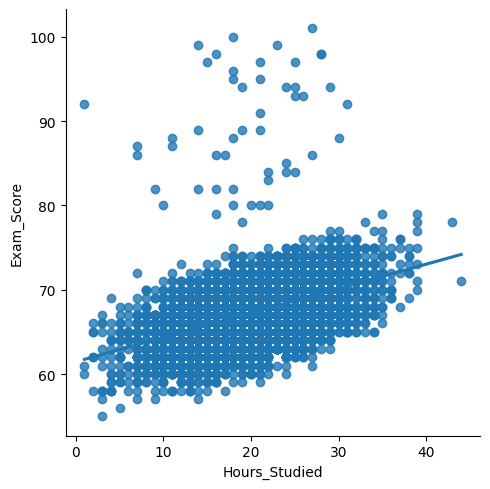

In [37]:
sns.lmplot(x="Hours_Studied", y="Exam_Score", data=scores, fit_reg=True, ci = None)


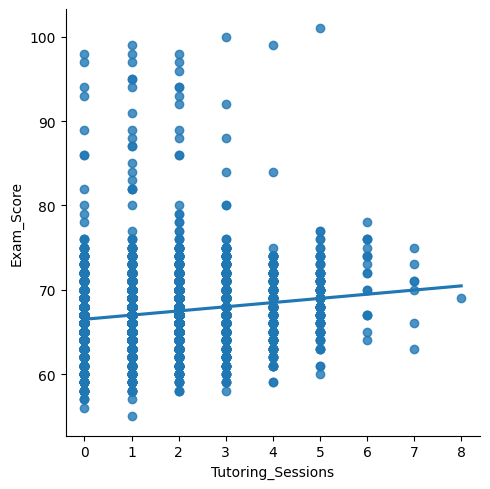

In [38]:
# trying out the plot with a column that the correlation is very low
sns.lmplot(x="Tutoring_Sessions", y="Exam_Score", data=scores, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

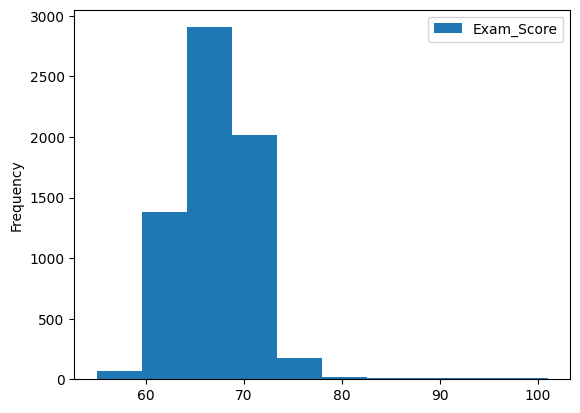

In [39]:
#this shows that most students scored average with a few struggling and excelling
scores.plot.hist(y="Exam_Score") 

In [55]:
#this next step is to find the missing values in the dataset
scores[scores.isnull().any(axis=1)]

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,Peer_Influence,Exam_Score


In [56]:
#since I've cleaned the dataset,there are no missing values left
print(scores.isnull().sum())

Hours_Studied          0
Attendance             0
Access_to_Resources    0
Sleep_Hours            0
Previous_Scores        0
Motivation_Level       0
Internet_Access        0
Tutoring_Sessions      0
Teacher_Quality        0
Peer_Influence         0
Exam_Score             0
dtype: int64


In [41]:
#now I'm going to drop any row that has a missing value
scores = scores.dropna()

In [42]:
scores

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,Peer_Influence,Exam_Score
0,23,84,0,7,73,1,1,0,2,2,67
1,19,64,2,8,59,1,1,2,2,0,61
2,24,98,2,7,91,2,1,2,2,1,74
3,29,89,2,8,98,2,1,1,2,0,71
4,19,92,2,6,65,2,1,3,0,1,70
...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,7,76,2,1,1,2,2,68
6603,23,76,2,8,81,2,1,3,0,2,69
6604,20,90,1,6,65,1,1,3,2,0,68
6605,10,86,0,6,91,0,1,2,2,2,68


In [43]:
#time to split the data into train data and test data using train_test_split
!pip install scikit-learn
from sklearn.model_selection import train_test_split

#seperate features(X) and target(y)
X = scores.drop("Exam_Score", axis=1) #all columns except Exam_Score
y = scores["Exam_Score"] #the column we want to predict(the target)

#split the dataset
#random_state=42 --a “seed” for randomness. Setting it ensures you get the same split every time (important for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)




In [48]:
from sklearn.linear_model import LinearRegression

#creates the model
model = LinearRegression()

#trains it on training data
model.fit(X_train,y_train)

#predict on test data..recall it's y_test predictions
predictions = model.predict(X_test)
print(predictions[:10])

[65.28722748 67.78537943 68.65928697 67.32478784 65.53231877 67.54807072
 71.05583115 67.19169422 69.72324501 68.76904444]


In [50]:
results = pd.DataFrame({"Actual": y_test, "Predicted" : predictions}).reset_index(drop=True)
#instead of it showing index values of rows from the original dataset(y_test)
print(results.head(10))

   Actual  Predicted
0      65  65.287227
1      65  67.785379
2      71  68.659287
3      64  67.324788
4      66  65.532319
5      66  67.548071
6      72  71.055831
7      66  67.191694
8      70  69.723245
9      70  68.769044


In [52]:
!pip install matplotlib

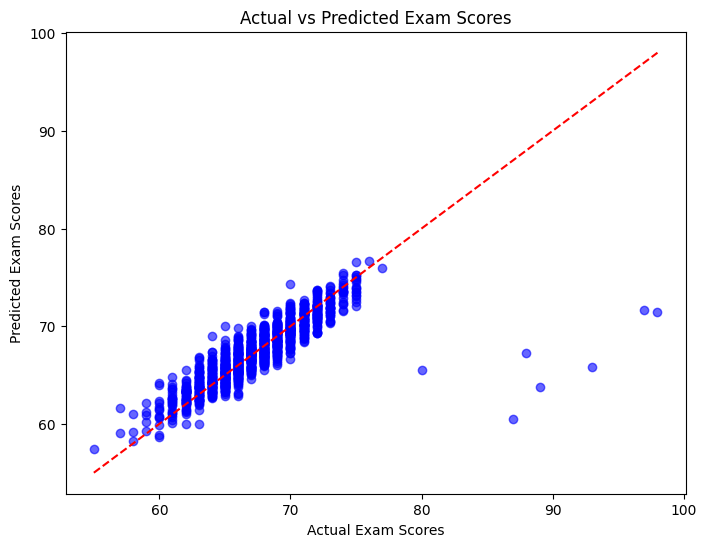

In [53]:
#checking model accuracy with visuals
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6, color="blue") #points
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()
         

In [70]:
#evaluating with error metrics(how far off the predictions are)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error(MAE): {mae:.4f}")
print(f"Mean Squared Error(MSE): {mse:.4f}")
print(f"Root Mean Squared Error(RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error(MAE): 1.1502
Mean Squared Error(MSE): 4.7398
Root Mean Squared Error(RMSE): 2.1771
R^2 Score: 0.6647


Comparing linear regression performance to polynomial regression

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

In [71]:
#for d in range(1,6): 
    #poly = PolynomialFeatures(degree=d)--this is to get the best degree from 1-5 for your model

# after trial,degree 2 was the best option
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#Train the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

#Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# --- Step 4: Evaluate the model ---
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)

print("Polynomial Regression(Degree 2)Results:")
print(f"Mean Absolute Error(MAE): {mae:.4f}")
print(f"Mean Squared Error(MSE): {mse:.4f}")
print(f"Root Mean Squared Error(RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Polynomial Regression(Degree 2)Results:
Mean Absolute Error(MAE): 1.0057
Mean Squared Error(MSE): 4.3386
Root Mean Squared Error(RMSE): 2.0829
R^2 Score: 0.6931


In [ ]:
#comes from Matplotlib’s plotting syntax
#"r--" a shorthand for line style and color
#"r" = red
#"--" = dashed line
#So "r--" = red dashed line.
#lw=2 → this means line width is 2 (thicker than default).

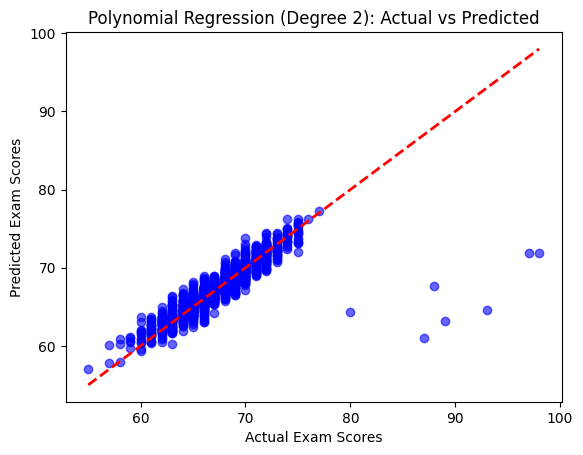

In [73]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_poly, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw =2)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Polynomial Regression (Degree 2): Actual vs Predicted")
plt.show()

In [77]:
#cross-validation--Instead of relying on one train-test split, check your model’s average performance across multiple splits

from sklearn.model_selection import cross_val_score

#making polynomial features
X_poly = poly.fit_transform(X)

#cross-validate using R^2
cv_scores = cross_val_score(poly_model, X_poly, y, cv=5, scoring="r2")

print("Cross-validation r^2 scores:", cv_scores)
print("Average R²:", cv_scores.mean())


Cross-validation r^2 scores: [0.57697755 0.64272836 0.63846784 0.65020899 0.74754967]
Average R²: 0.6511864817708186
